# Lab 4: Geospatial Data Visualization

In this lab, you will analyze the geographical distribution of the population of the State of Illinois and its temporal changes from 1980 to 2010. You will find that most of the tasks were covered in the lecture, and it is another reproduction of the tasks. The difference is the study area (Illinois instead of Texas), and we focus on temporal changes of the general population instead of COVID-19 cases. 

The data of this lab was obtained from the following resources. 
* County geometry: https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2010.html
* Temporal chagnes of the population: http://www.idph.state.il.us/health/census1980_2010.htm

## Structure
### 1. Data Manipulation (0.5 point)
In order to visualize the geospatial data, you need to obtain data (i.e., GeoDataFrame), properly. Here, with the help of `GeoPandas`, let's create a GeoDataFrame as shown below. <br>
<img src="./data/Exercise_1.jpg" style="width: 600px;"/>

### 2. A Single Choropleth Map (1.5 point)
Here, you will create a single Choropleth map with the merged `county` GeoDataFrame from the previous task. The result should look to the map below. <br>
<img src="./data/Exercise_2.png" style="width: 400px;"/>

### 3. Multiple Choropleth Map (2 point)

Here, you will make a `figure` have four `axes`, and each of the `axes` will have a Choropleth map of the population from 1980 to 2010. The result should look to the map below.
<img src="./data/Exercise_3.png" style="width: 800px;"/>

### 4. Creating a Web Map with GeoPandas and Folium (1 point)
Here, you will be making an interactive web map with GeoPandas and Folium by using <a href=https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html>`gpf.explore()`</a> method. The result web map should look like <a href=./data/webmap_example.html>this</a>. 

## Notes:
**Before you submit your lab, make sure everything runs as expected WITHOUT ANY ERROR.** <br>
**Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`:**

In [1]:
FULL_NAME = ""

In [2]:
# Import necessary packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import mapclassify
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

## 1. Data Manipulation (0.5 point)
In order to visualize the geospatial data, you need to obtain data (i.e., GeoDataFrame), properly. Here, with the help of `GeoPandas`, let's create a GeoDataFrame as shown below. <br>

<img src="./data/Exercise_1.jpg" style="width: 600px;"/>

**1.1.** (0.25 point) Import two datasets (`illinois_county.shp` and `population_chage.csv`) in the `data` folder with the names of `county` and `pop`, respectively. Use GeoPandas for `illinois_county.shp`, given it has geometry. Use Pandas for `population_chage.csv` given it doesn't have geometry. 

**1.2.** (0.25 point) Investigate the contents to find the shared information between two DataFrames and **merge `pop` to `county`**. You can use either the indexes to merge or the name, since they have a colume with the same name. Take a look at <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html>this website</a> for your reference.

In [3]:
# Your code here
## Step 1.1
county = gpd.read_file('./data/illinois_county.shp')
pop = pd.read_csv('./data/population_change.csv')

# Step 1.2. 
county = county.merge(pop, on='County')
county

County  GEOID                                           geometry  \
0         Brown  17009  POLYGON ((-90.68319 39.84005, -90.68452 39.840...   
1      Crawford  17033  POLYGON ((-87.73969 39.17221, -87.73583 39.172...   
2    Jo Daviess  17085  POLYGON ((-90.43049 42.28439, -90.43022 42.284...   
3      Hamilton  17065  POLYGON ((-88.59618 37.90728, -88.60228 37.907...   
4     McDonough  17109  POLYGON ((-90.67320 40.63154, -90.67292 40.631...   
..          ...    ...                                                ...   
97          Lee  17103  POLYGON ((-89.51608 41.58503, -89.51609 41.585...   
98     Marshall  17123  POLYGON ((-89.04724 41.01330, -89.04724 41.012...   
99      Clinton  17027  POLYGON ((-89.25424 38.74202, -89.25340 38.742...   
100      McLean  17113  POLYGON ((-88.57450 40.61655, -88.57170 40.616...   
101       Perry  17145  POLYGON ((-89.44237 38.21539, -89.44176 38.215...   

     Year1980  Year1990  Year2000  Year2010  
0        5411      5836      6950      6937  
1       20818     19464     20452     19817  
2       23520     21821     22289     22678  
3        9172      8499      8621      8457  
4       37467     35244     32913     32612  
..        ...       ...       ...       ...  
97      36328     34392     36062     36031  
98      14479     12846     13180     12640  
99      32617     33944     35535     37762  
100    119149    129180    150433    169572  
101     21714     21412     23094     22350  

[102 rows x 7 columns]

In [4]:
""" Test code for the previous code. This cell should NOT give any errors when it is run."""
# Task 1.1.
assert type(county) == gpd.GeoDataFrame
assert type(pop) == pd.DataFrame

# Task 1.2.
assert county.shape == (102, 7) 

print('Success!')

Success!


## 2. A Single Choropleth Map (1.5 point)

Here, you will create a single Choropleth map with the merged `county` GeoDataFrame from the previous task. The result should look to the map below. <br>

<img src="./data/Exercise_2.png" style="width: 600px;"/>



**2.1.** (0.25 point) Initiate a plot with `plt.subplots()`. Specify the figure size as 10 by 20, and **Note** that you are making a single map. <br>
**2.2.** (0.5 point) Create a Choropleth map based on the population in 2010 (i.e., `Year2010` column in `county` GeoDataFrame). Use the following attributes for a specific style.
* Colormap (`cmap`): 'Blues'
* Classification scheme (`scheme`): 'FisherJenks'
* Number of classes (`k`): 5 

**2.3.** (0.5 point) Create boundaries of the county polygons with `gpd.boundary` and plot it over the Choropleth map, above. Use the following attributes for a specific style. 
* Color (`color`): 'black'
* Line width (`linewidth`): 0.5
* Line style (`linestyle`): 'dotted'

**2.4.** (0.25 point) Fill in the missing information (i.e., `NAME OF YOUR DATAFRAME` and `NAME OF A COLUMN`) from the code below for annotating each county with its `GEOID` column. <br>
<a href=https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html>*GEOIDs*</a> are numeric codes that uniquely identify all administrative/legal and statistical geographic areas for which the Census Bureau tabulates data. <br>

```python
    for idx, row in [`NAME OF YOUR DATAFRAME`].iterrows(): # Iterate everyrow in a GeoDataFrame
        ax.text(s=row[`NAME OF A COLUMN`], # String to be displayed
                x=row['geometry'].centroid.coords[:][0][0], # X coordinate of label
                y=row['geometry'].centroid.coords[:][0][1], # Y coordinate of label
                fontsize=10, 
                color='white',
                ha='center', # Horizontal align
                va='center', # Vertical align
                path_effects=[pe.withStroke(linewidth=2, foreground="black")] 
               )
```


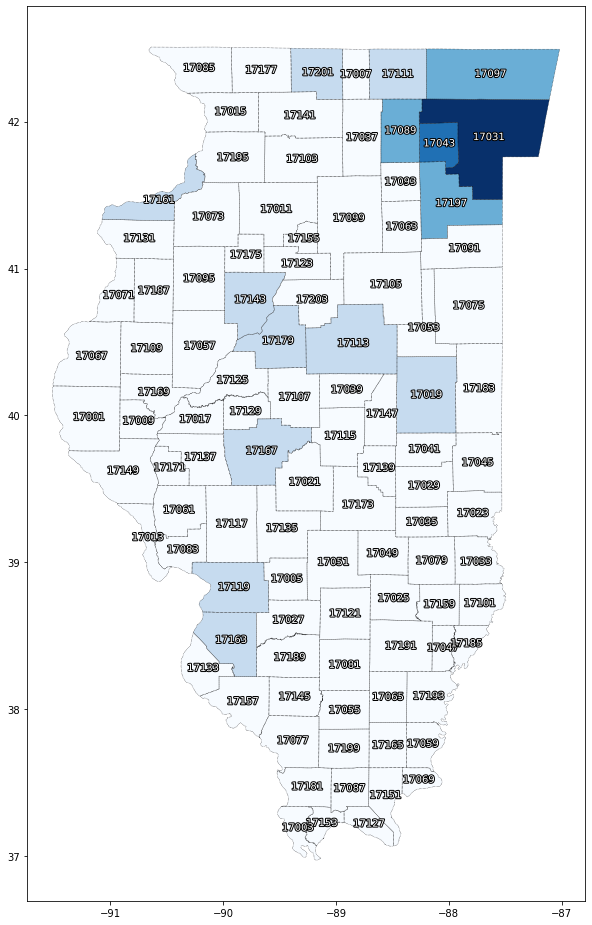

In [5]:
# Your code here
# Task 2.1.
fig, ax = plt.subplots(figsize=(10, 20))

# Task 2.2.
county.plot('Year2010', ax=ax, cmap='Blues', scheme='FisherJenks', k=5)

# Task 2.3.
county.boundary.plot(color='black', # color. 
                     linewidth=0.5, # Line width, given it draws the boundary of polygon
                     linestyle='dotted', # Line style of the boundary; https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
                     ax=ax)

# Task 2.4.
for idx, row in county.iterrows(): # Iterate everyrow in a GeoDataFrame
    ax.text(s=row['GEOID'], # String to be displayed
            x=row['geometry'].centroid.coords[:][0][0], # X coordinate of label
            y=row['geometry'].centroid.coords[:][0][1], # Y coordinate of label
            fontsize=10, 
            color='white',
            ha='center', # Horizontal align
            va='center', # Vertical align
            path_effects=[pe.withStroke(linewidth=2, foreground="black")] 
           )
    

## 3. Multiple Choropleth Map (2 point)

Here, you will make a `figure` have four `axes`, and each of the `axes` will have a Choropleth map of the population from 1980 to 2010. The result should look to the map below.

<img src="./data/Exercise_3.png" style="width: 1000px;"/>

### 3.1. Create a customized color map (0.5 point)
**3.1.1.** Visit <a href=https://colorbrewer2.org/>`ColorBrewer`</a> and grab hex color codes of `YlGnBu` color with `5` classes as you can see on the screen capture below. 
<img src="./data/Exercise_4.jpg" style="width: 600px;"/>

**3.1.2.** (0.25 point) Save the hex code as a list, `color_brewer`. Note that you need to make each hex code as a string. <br>
```python
    color_brewer = ['#hexcode1', '#hexcode2', '#hexcode3'..]
```
**3.1.3.** (0.25 point) Feed the list to `LinearSegmentedColormap.from_list()` method and create an instance of color bar with the name of `cm`. When you call `cm`, the following color bar should pop up. Note that you need to use attribute `N=5` to make this ColorMap has only five colors. 
<img src="./data/Exercise_5.jpg" style="width: 300px;"/>

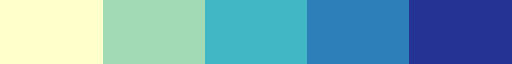

In [6]:
# Your code here
# Task 3.1.1.
# https://colorbrewer2.org/#type=sequential&scheme=YlGnBu&n=5

# Task 3.1.2.
color_brewer = ['#ffffcc','#a1dab4','#41b6c4','#2c7fb8','#253494']

# Task 3.1.3.
cm = LinearSegmentedColormap.from_list('Name Your Color Bar', color_brewer, N=5)
cm

In [7]:
""" Test code for the previous code. This cell should NOT give any errors when it is run."""
# Task 3.1.
assert type(color_brewer) == list
assert type(cm) == LinearSegmentedColormap
assert cm.N == 5

print('Success!')

Success!


### 3.2. Define Map Classes with `mapclassify` (0.5 point). 

**3.2.1.** (0.25 point) Create a Dataframe, named `pop_change` by slicing `county` GeoDataFrame. The DataFrame `pop_change` will have 102 rows (i.e., the number of counties) and four columns (`Year1980`, `Year1990`, `Year2000`, `Year2010`) granted from `county` GeoDataFrame. The code below will help you with this task.
```python
pop_change = county[['List of Columns']] 
```
**3.2.2.** (0.25 point) Feed `pop_change` DataFrame to `mapclassify.FisherJenks()` method and save the instance to `map_class` variable. This will provide the classes that can be used regardless of columns (`Year1980`, `Year1990`, `Year2000`, `Year2010`). 


In [8]:
# Your code here
# Task 3.2.1.
pop_chage = county[['Year1980', 'Year1990', 'Year2000', 'Year2010']]

# Task 3.2.2.
map_class = mapclassify.FisherJenks(pop_chage)
print(map_class)

FisherJenks                     

        Interval           Count
--------------------------------
[   4320.00,   81625.00] |   330
(  81625.00,  201081.00] |    44
( 201081.00,  516418.00] |    23
( 516418.00,  916924.00] |     7
( 916924.00, 5376741.00] |     4


In [9]:
""" Test code for the previous code. This cell should NOT give any errors when it is run."""
def array_comparison(arr1, arr2):
    comparison = arr1 == arr2
    equal_arrays = comparison.all()
    
    return equal_arrays

# Task 3.2.
assert pop_chage.columns.to_list() == ['Year1980', 'Year1990', 'Year2000', 'Year2010']
assert type(map_class) == mapclassify.classifiers.FisherJenks
assert array_comparison(map_class.bins, np.array([81625, 201081, 516418, 916924, 5376741]))

print('Success!')

Success!


### 3.3. Creating a Figure with Multiple Axes (1 point)

**3.3.1.** (0.25 point) Create `fig` and `axes` with `plt.subplots(nrows=[number needed], ncols=[number needed], figsize=(15, 10))`. As we have four columns (`Year1980`, `Year1990`, `Year2000`, `Year2010`) to be displayed, we want to have **1** row and **4** columns. <br>
**3.3.2.** (0.5 point) Populate each of the axes with the population distribution of each decennial. You can modify and provide proper variables to the following two lines of the code. Note that you can answer this question in two ways: 1) Copy and paste the codes four times or 2) take advantage of a for loop. 

```python
county.plot(`NAME OF A COLUMN`, 
            ax=`LOCATION ON THE AXES`, 
            cmap=cm, # This will use the colormap defined in the previous task
            scheme='user_defined', # This use the classification defined in the previous task
            classification_kwds={'bins': map_class.bins} # This use the classification defined in the previous task
           )
county.boundary.plot(color='black', linewidth=0.5, linestyle=':', ax=`LOCATION ON THE AXES`)
```
**3.3.3.** (0.25 point) Set the title of each of the axes with different name. For example, the first plot can be named as 'Population at Year 1980'. 

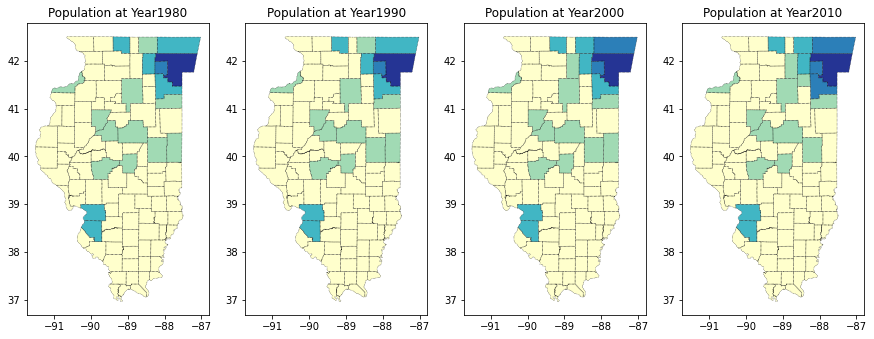

In [10]:
# Your code here
## Task 3.3.1.
fig, axes = plt.subplots(1, 4, figsize=(15, 10))

focus_year = ['Year1980', 'Year1990', 'Year2000', 'Year2010']
for idx, ax in enumerate(axes):
    ## Task 3.3.2.
    county.plot(focus_year[idx], ax=ax, scheme='user_defined', cmap=cm, classification_kwds={'bins': map_class.bins})
    county.boundary.plot(color='black', linewidth=0.5, linestyle=':', ax=ax)
    
    ## Task 3.3.3.
    ax.set_title(f'Population at {focus_year[idx]}')
    
plt.show()

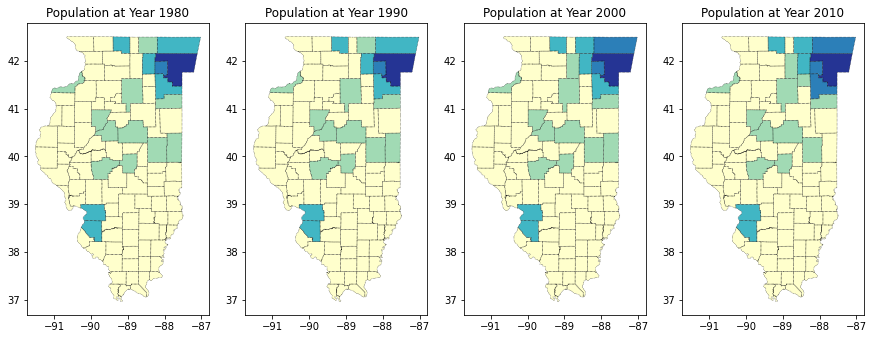

In [11]:
# Your code here
## Task 3.3.1.
fig, axes = plt.subplots(1, 4, figsize=(15, 10))

## Task 3.3.2.
county.plot('Year1980', ax=axes[0], scheme='user_defined', cmap=cm, classification_kwds={'bins': map_class.bins})
county.plot('Year1990', ax=axes[1], scheme='user_defined', cmap=cm, classification_kwds={'bins': map_class.bins})
county.plot('Year2000', ax=axes[2], scheme='user_defined', cmap=cm, classification_kwds={'bins': map_class.bins})
county.plot('Year2010', ax=axes[3], scheme='user_defined', cmap=cm, classification_kwds={'bins': map_class.bins})

county.boundary.plot(color='black', linewidth=0.5, linestyle=':', ax=axes[0])
county.boundary.plot(color='black', linewidth=0.5, linestyle=':', ax=axes[1])
county.boundary.plot(color='black', linewidth=0.5, linestyle=':', ax=axes[2])
county.boundary.plot(color='black', linewidth=0.5, linestyle=':', ax=axes[3])

## Task 3.3.3.
axes[0].set_title('Population at Year 1980')
axes[1].set_title('Population at Year 1990')
axes[2].set_title('Population at Year 2000')
axes[3].set_title('Population at Year 2010')

plt.show()

## 4. Creating a Web Map with GeoPandas and Folium (1 point)

Here, you will be making an interactive web map with GeoPandas and Folium by using <a href=https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html>`gpf.explore()`</a> method. The result web map should look like <a href=./data/webmap_example.html>this</a>. <br>
In detail, the web map should be colored based on the population in 2010, with the color map of `Blues`. In addition, the counties should be classified into 7 groups based on `FisherJenks`. When you hover the mouse over counties, the name of a county should be appeared. Also, upon clicking, the pop-up will show the population from 1980 to 2010. 

**4.1.** Modify the code provided below, and create a web map based on the information in the GeoDataFrame `county`. 
```python
m = county.explore(column=`STRING NEEDED`,  # You will display the population in 2010. 
                   cmap=`STRING NEEDED`, # You will use colormap named 'Blues'.
                   scheme=`STRING NEEDED`, # You will use `FisherJenks` algorithm for the classification.
                   k=7,# This is the number of classes. 
                   popup=`LIST OF VALUES NEEDED`, # The pop up will show the population from 1980 to 2010. 
                   tooltip=`STRING NEEDED` # Hovering mouse will display the name of a county. 
                  )
```
**4.2.** Save the web map into the data folder as the name of `webmap_YOUR_NET_ID.html`.

In [12]:
# Your code here
m = county.explore(column='Year2010', 
                   cmap='Blues',
                   scheme='FisherJenks', 
                   k=7,
                   popup=['Year1980', 'Year1990', 'Year2000', 'Year2010'],
                   tooltip='County'
                  )

m.save('./data/webmap_example.html')
m

### *You have finished Lab 4: Geospatial Data Visualization*
Please name your jupyter notebook as `GEOG489_Lab4_[YOUR_NET_ID].ipynb`, and upload it to https://learn.illinois.edu. 